In [1]:
import numpy as np
import pandas as pd
from utils import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [5]:
total_solar_weather = np.load('total_solar_weather_pm_2013_2020.npy', allow_pickle=True)

In [11]:
total_solar_weather[0][35064:]

array([0.0, 192.0, -2.4, nan, 0.0, 0.0, 85.0, 4.4, -4.5, 1026.5, 1030.4,
       nan, nan, nan, nan, nan, nan, nan, nan, 720.0, nan, nan, -1.3, nan,
       nan, nan, nan, '경남 진주시', '도시대기', 238133, '상대동(진주)', 2017010101,
       0.002, 0.8, 0.01, 0.024, 60.0, 26.0, '경남 진주시 동진로 279'],
      dtype=object)

In [2]:
locations = config['experiments']['location_used']
columns = config['experiments']['features_used']

In [12]:
for loc in locations:
    temp_data = pd.DataFrame(total_solar_weather[locations.index(loc)][35064:], columns=columns)
    temp_data.to_csv(f"./dataset/total_solar_weather_2017_2020_{loc}.csv", encoding='cp949')
    

PCC value 구하기

In [22]:
total_solar_weather[:, 35064:, 0].shape

(38, 35064)

In [23]:
locations = config['experiments']['location_used']
columns = config['experiments']['features_used']

In [31]:
columns = ['발전률',
 '지점',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '풍향(16방위)',
 '습도(%)',     #!
 '증기압(hPa)', #!
 '이슬점온도(°C)',
 '현지기압(hPa)',   #!
 '해면기압(hPa)',
 '일조(hr)',    #!
 '일사(MJ__m2)',    #!
 '적설(cm)',
 '3시간신적설(cm)',
 '전운량(10분위)',
 '중하층운량(10분위)',
 '운형(운형약어)',
 '최저운고(100m )',
 '시정(10m)',
 '지면상태(지면상태코드)',
 '현상번호(국내식)',
 '지면온도(°C)',    #!
 '5cm 지중온도(°C)',
 '10cm 지중온도(°C)',
 '20cm 지중온도(°C)',
 '30cm 지중온도(°C)',
 '지역',
 '망',
 '측정소코드',
 '측정소명',
 '측정일시',
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 '주소']

In [120]:
feature_columns = [#'발전률',
 '기온(°C)',    #!
 '강수량(mm)',  #!
 '풍속(m__s)',  #!
 '습도(%)',     #!
 '증기압(hPa)', #!
 '현지기압(hPa)',   #!
 '일조(hr)',    #!
 '일사(MJ__m2)',    #!
 '지면온도(°C)',    #!
 'SO2',         #!
 'CO',          #!
 'O3',          #!
 'NO2',         #!
 'PM10',        #!
 'PM25',        #!
 ]

##corr 구하기 위해서 feature별로 csv 파일 생성

In [32]:

for col in columns:
    temp_data = pd.DataFrame(total_solar_weather[:, 35064:, columns.index(col)].T, columns=locations)
    temp_data.to_csv(f"./dataset/features/total_area_2017_2020_{col}.csv", encoding='cp949')
    

In [175]:
total_corr = pd.DataFrame(0.0, columns=locations, index=locations)
count = pd.DataFrame(0, columns=locations, index = ['count'])

for feature in feature_columns:
    try:
        corr = pd.read_csv(f'./dataset/features/total_area_2017_2020_{feature}.csv', encoding='cp949', index_col=0)

        
        if feature == '강수량(mm)' or '일조(hr)' or '일사(MJ__m2)':
            corr = corr.fillna(0)
        else:
            corr = corr.ffill()
            corr = corr.bfill()
            
        corr = corr.corr()
        # print(corr)
        for loc0 in corr.columns:
            count[loc0] += 1
            for loc1 in corr.index:
                total_corr[loc0][loc1] += corr[loc0][loc1]
        
    except:
        pass
    # corr = corr.T.dropna().T
    
    # corr = corr.corr()
    # print(feature, '\n', corr, '\n')

In [168]:
count

,경상대,광양항세방,구미,남동발전_본사사옥,영동,예천,남제주소내,부산복합자재창고,부산복합1단계,부산수처리장,...,당진매립장_송악,당진자재창고,동해,수원환경사업소,황금물류센터,세종시폐기물매립장,연성정수장,영암에프원b,대구,신안
count,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14


['경상대', '광양항세방', '구미', '남동발전_본사사옥', '영동', '예천', '남제주소내', '부산복합자재창고',
       '부산복합1단계', '부산수처리장', '부산신항', '부산본부', '삼척소내', '신인천소내', '신인천전망대',
       '신인천해수취수구', '영월본부', '영월철도부지', '위미2리', '인천수산정수장', '하동공설운동장', '하동변전소',
       '하동보건소', '하동본부', '하동정수장', '하동하수처리장', '광양항', '당진', '당진매립장_송악', '당진자재창고',
       '동해', '수원환경사업소', '황금물류센터', '세종시폐기물매립장', '연성정수장', '영암에프원b', '대구', '신안']

In [285]:
total_corr.columns
# loc_list = [location_var.index('부산복합자재창고'), location_var.index('인천수산정수장'), location_var.index('하동보건소')]
loc_list = ['경상대', '예천', '남제주소내', '부산복합자재창고', '영월본부', '인천수산정수장', '하동보건소', '신안']


In [286]:

solar_ratio = pd.read_csv(f"./dataset/features/total_area_2017_2020_발전률.csv", encoding='cp949', index_col=0)

In [287]:

solar_ratio[loc_list].max()

경상대         0.822630
예천          0.845900
남제주소내       0.822898
부산복합자재창고    0.874011
영월본부        0.573618
인천수산정수장     0.970870
하동보건소       0.950100
신안          0.854888
dtype: float64

In [288]:
solar_loc = solar_ratio[loc_list]
temp = solar_ratio[loc_list]

In [289]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(solar_loc)

temp_transform = scaler.transform(solar_loc)

In [290]:
temp.to_numpy()[:] = temp_transform

In [291]:
temp

,경상대,예천,남제주소내,부산복합자재창고,영월본부,인천수산정수장,하동보건소,신안
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
35059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35062,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [292]:
solar_ratio_transform = temp

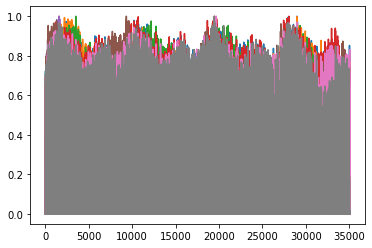

In [326]:
import matplotlib.pyplot as plt
plt.plot(solar_ratio_transform)

D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\pytorch\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\DJK-Office\Anaconda3\envs\

<AxesSubplot:>

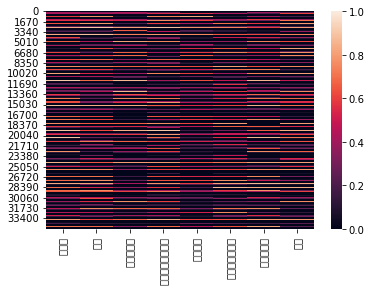

In [293]:
sns.heatmap(solar_ratio_transform)

In [294]:
total_corr_avg = total_corr/14.0

In [317]:
total_corr_avg_loc = total_corr_avg.loc[loc_list, loc_list]

In [318]:
total_corr_avg_loc

,경상대,예천,남제주소내,부산복합자재창고,영월본부,인천수산정수장,하동보건소,신안
경상대,1.000000,0.518281,0.492375,0.614140,0.599221,0.542306,0.595032,0.619194
예천,0.518281,1.000000,0.390100,0.475521,0.557326,0.482886,0.472878,0.484225
남제주소내,0.492375,0.390100,1.000000,0.497347,0.434382,0.433540,0.487535,0.508874
부산복합자재창고,0.614140,0.475521,0.497347,1.000000,0.542124,0.541783,0.527943,0.568242
영월본부,0.599221,0.557326,0.434382,0.542124,1.000000,0.616429,0.491934,0.587607
인천수산정수장,0.542306,0.482886,0.433540,0.541783,0.616429,1.000000,0.476378,0.571507
하동보건소,0.595032,0.472878,0.487535,0.527943,0.491934,0.476378,1.000000,0.545357
신안,0.619194,0.484225,0.508874,0.568242,0.587607,0.571507,0.545357,1.000000


In [319]:
for i in range(len(total_corr_avg_loc)):
    total_corr_avg_loc.iloc[i,i] = np.nan

In [327]:
total_corr_avg_loc.to_csv('total_corr_avg_loc.csv')

In [328]:
total_corr_avg_loc

,경상대,예천,남제주소내,부산복합자재창고,영월본부,인천수산정수장,하동보건소,신안
경상대,NaN,0.518281,0.492375,0.614140,0.599221,0.542306,0.595032,0.619194
예천,0.518281,NaN,0.390100,0.475521,0.557326,0.482886,0.472878,0.484225
남제주소내,0.492375,0.390100,NaN,0.497347,0.434382,0.433540,0.487535,0.508874
부산복합자재창고,0.614140,0.475521,0.497347,NaN,0.542124,0.541783,0.527943,0.568242
영월본부,0.599221,0.557326,0.434382,0.542124,NaN,0.616429,0.491934,0.587607
인천수산정수장,0.542306,0.482886,0.433540,0.541783,0.616429,NaN,0.476378,0.571507
하동보건소,0.595032,0.472878,0.487535,0.527943,0.491934,0.476378,NaN,0.545357
신안,0.619194,0.484225,0.508874,0.568242,0.587607,0.571507,0.545357,NaN


In [323]:
total_corr_avg_loc.max(), total_corr_avg_loc.min()

(경상대         0.619194
 예천          0.557326
 남제주소내       0.508874
 부산복합자재창고    0.614140
 영월본부        0.616429
 인천수산정수장     0.616429
 하동보건소       0.595032
 신안          0.619194
 dtype: float64,
 경상대         0.492375
 예천          0.390100
 남제주소내       0.390100
 부산복합자재창고    0.475521
 영월본부        0.434382
 인천수산정수장     0.433540
 하동보건소       0.472878
 신안          0.484225
 dtype: float64)

In [333]:
plt.rcParams['font.family'] = 'Malgun Gothic'

## 날씨 유사도 PCC 평균값 그래프

<AxesSubplot:>

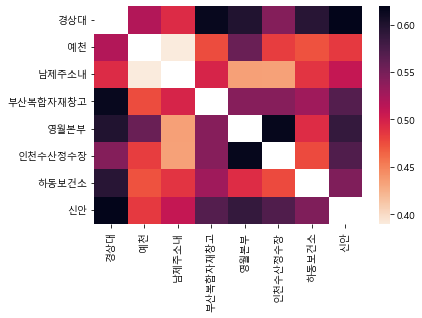

In [342]:
sns.heatmap(total_corr_avg_loc, cmap='rocket_r')

In [57]:
solar = pd.read_csv('./dataset/features/total_area_2017_2020_발전률.csv', encoding='cp949', index_col=0)

In [58]:
solar = solar.T.dropna().T
solar

,경상대,구미,영동,예천,남제주소내,부산복합자재창고,부산복합1단계,부산신항,신인천소내,영월본부,인천수산정수장,하동공설운동장,하동변전소,하동보건소,하동본부,하동정수장,하동하수처리장,대구,신안
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,0.0,0.0,0.321141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35060,0.0,0.0,0.623640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35061,0.0,0.0,0.649846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35062,0.0,0.0,0.130402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
total_corr = pd.DataFrame(0.0, columns=locations, index=locations)
count = pd.DataFrame(0, columns=locations, index = ['count'])

In [109]:
total_corr = pd.DataFrame(0.0, columns=locations, index=locations)
count = pd.DataFrame(0, columns=locations, index = ['count'])

corr = solar.corr()
for loc0 in corr.columns:
    count[loc] += 1
    for loc1 in corr.index:
        total_corr[loc0][loc1] = corr[loc0][loc1]

In [72]:
temp = pd.read_csv('./dataset/features/total_area_2017_2020_기온(°C).csv', encoding='cp949', index_col=0)

In [73]:
temp = temp.interpolate()

In [75]:
temp = temp.T.dropna().T